In [101]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv(r'/Volumes/study/all csv files /bank.csv',delimiter=';')

# About Dataset
There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.


# Data Set Information
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.
There are two datasets: train.csv with all examples (32950) and 21 inputs including the target feature, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
test.csv which is the test data that consists of 8238 observations and 20 features without the target feature
Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).
The dataset contains train and test data. Features of train data are listed below. And the test data have already been preprocessed


In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# Task:-
1)Create a knn model to classify whether the client subscribed a term deposit or not?(Find best k value)
    **** Do all the analysis,preprocessing ,modeling stage correctly

2)And also try to do research and how to get probabilistic values of your predicted class labels



# DATA ANAYLSIS

# 1) CHECHKING WHETHER DATA IS BALANCED OR IMBALANCED 

In [4]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

Here the given dataset is highly imbalanced it might create a dum model , so we need to make it balanced    

# 2) CHECHKING WHETHER DATA IS HAVING MISSING VALUES OR NOT 

In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

there are no missing values in the given dataset 

# 3) CHECKING FOR OUTLIERS IN THE DATASET 

# finding outliers using z-socre

In [6]:
def bank(x):
    if type(data[x][0])==np.int64:
        print(x)
        mean = data[[x]].mean()
        std = data[[x]].std()
        lower_limit = mean-3*std
        upper_limit = mean+3*std
        out1 = data.loc[data[x]<lower_limit[0]][x]
        out2 = data.loc[data[x]>upper_limit[0]][x]
        return out1,out2
    else:pass

In [65]:
for i in data.columns:
    print(bank(i))
    print('-------------------')

age
(Series([], Name: age, dtype: int64), 1052    71
1061    72
1708    71
2264    72
2846    72
3044    71
3284    72
3556    71
Name: age, dtype: int64)
-------------------
None
-------------------
None
-------------------
None
-------------------
None
-------------------
balance
(Series([], Name: balance, dtype: int64), 10      9374
138     8104
158     9009
165     6979
176     9216
        ... 
3808    6850
3873    7929
3892    7845
3918    6880
3924    6969
Name: balance, Length: 110, dtype: int64)
-------------------
None
-------------------
None
-------------------
None
-------------------
day
(Series([], Name: day, dtype: int64), Series([], Name: day, dtype: int64))
-------------------
None
-------------------
duration
(Series([], Name: duration, dtype: int64), 30       897
33       958
46      1018
264      988
266     1030
        ... 
3756     857
3767     921
3805     984
3849     866
3878     873
Name: duration, Length: 73, dtype: int64)
-------------------
campaign
(Seri

# finding outliers using box plot

<AxesSubplot:>

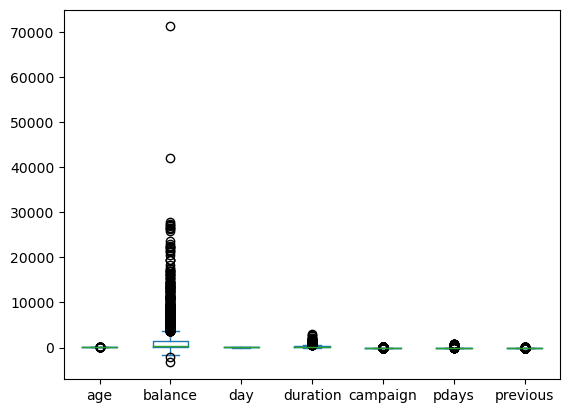

In [15]:
data.plot(kind='box')

# Dealin with outliers

In [49]:
index = []
columns_names = []
for i in data.columns:
    if bank(i)==None:
        pass
    else:
        columns_names.append(i)
        index.extend(bank(i)[1].index.to_list())

age
age
balance
balance
day
day
duration
duration
campaign
campaign
pdays
pdays
previous
previous


In [50]:
columns_names

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

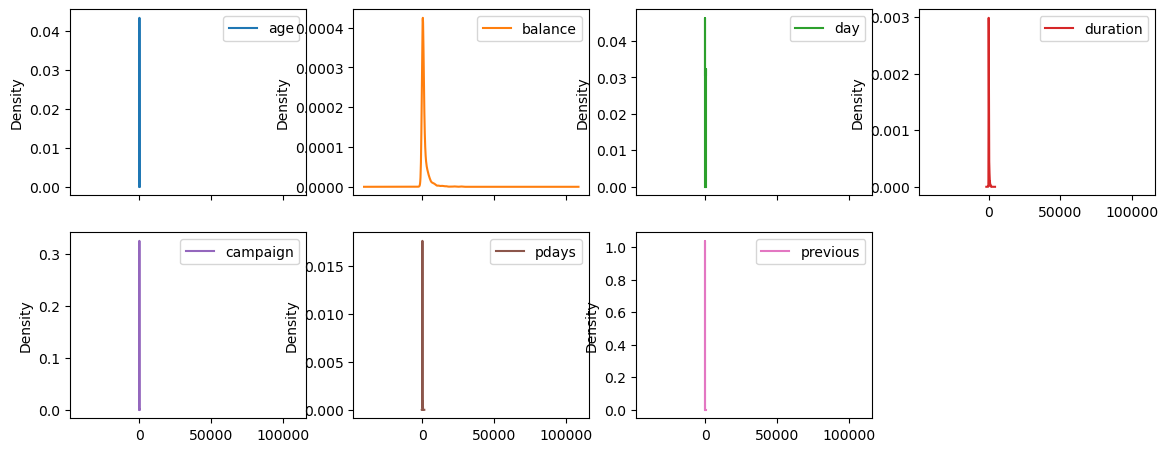

In [51]:
data[columns_names].plot(kind='kde',subplots=True,layout=(5,4),figsize=(14,14))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

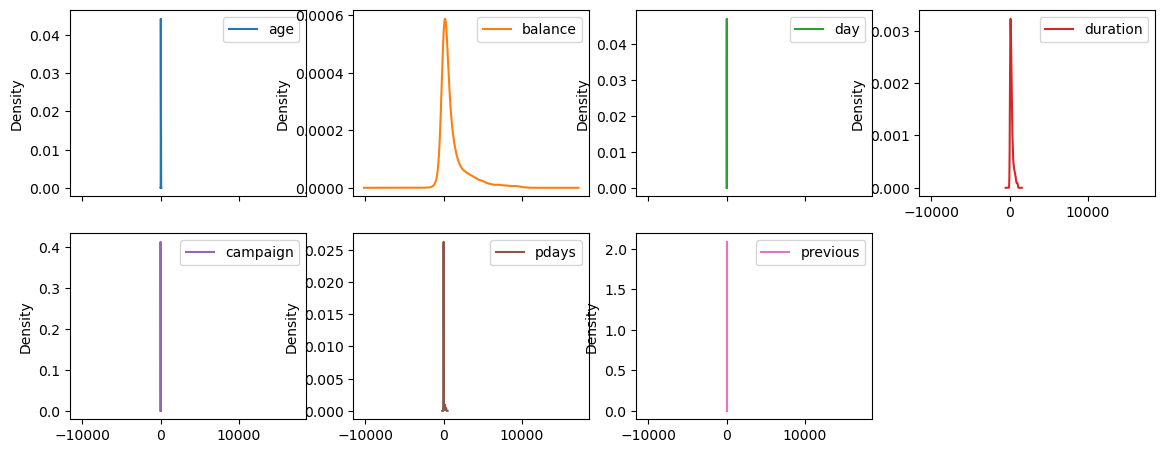

In [52]:
data.drop(list(set(index))).plot(kind='kde',subplots=True,layout=(5,4),figsize=(14,14))

The distributions are not much changed so we can remove the outliers from each column

In [53]:
data.drop(list(set(index)),inplace=True)
data.reset_index(drop=True,inplace=True)

In [54]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
3976,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
3977,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
3978,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no


In [74]:
data['job'].mode()[0]

'management'

In [80]:
data[['age']].value_counts()

age
34     206
32     201
31     177
33     168
36     166
35     161
37     143
38     135
30     131
42     128
41     127
40     125
39     117
46     104
48     101
49     101
45      99
43      97
47      93
28      92
44      91
50      90
55      88
53      86
27      83
57      83
29      79
51      79
58      77
52      77
26      71
54      64
59      62
56      61
25      40
60      39
24      23
23      18
61      16
66       9
22       8
63       8
64       7
62       7
65       6
21       6
69       6
70       6
71       4
72       4
67       4
19       3
20       2
68       1
dtype: int64

In [86]:
for i in data.columns:
    data[[i]].replace('unknown',data[i].mode()[0],inplace=True)

# SPLITING THE DATASET 

In [57]:
f_v = data[data.columns[:-1]]
label = data[['y']]

In [58]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(f_v,label,train_size=0.8,random_state=42,stratify=label)

### catogerical to numerical 

In [89]:
it = []
ob = []
for i in f_v.columns:
    if f_v[i].dtype == "object":
        ob.append(i)
    else:
        it.append(i)

In [90]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [93]:
ohe = OneHotEncoder()
a = ohe.fit_transform(x_train[ob]).toarray()
x_train[ohe.get_feature_names()] = pd.DataFrame(a)

/Users/vamsi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [94]:
x_train = x_train.drop(ob,axis=1)

In [95]:
tr = ohe.transform(x_test[ob]).toarray()
x_test[ohe.get_feature_names()] = pd.DataFrame(tr)
x_test = x_test.drop(ob,axis=1)

/Users/vamsi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [99]:
lr = LogisticRegression()
model = lr.fit(x_train,y_train)

/Users/vamsi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vamsi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
predi = model.predict(x_test)

In [103]:
print(classification_report(y_test, predi))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95       716
         yes       0.57      0.26      0.36        80

    accuracy                           0.91       796
   macro avg       0.74      0.62      0.65       796
weighted avg       0.89      0.91      0.89       796

